In [4]:
%matplotlib inline
import foggie
from astropy.table import Table
from astropy.convolution import Gaussian1DKernel, convolve_fft
import astropy.constants as const
from foggie.angular_momentum.utils import flatten_thelphil
import astropy.units as u
from glob import glob
import yt
plt.rcParams['text.usetex'] = True
cmp = plt.cm.viridis
cmp.set_bad('k')
import warnings
warnings.filterwarnings('ignore')
clrs = {'cold': 'darkblue',
        'warm': 'indianred',
        'warmhot': 'red',
        'hot': 'darkred',
        'stars': 'goldenrod',
        'dm': 'black',
        'baryons': 'green'}

mass_types = ['cold', 'warm', 'warmhot', 'hot', 'stars', 'baryons', 'dm']
halos = ['8508', '5016', '5036', '4123', '2392',  '2878']
in_dir = '/Users/rsimons/Dropbox/foggie/angular_momentum/profiles'


In [151]:
for halo in halos[:1]:
    fls = sort(glob('%s/%s/*npy'%(in_dir, halo)))
    for fl in fls[:1]:
        print (fl)
        a = np.load('/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/8508/Lprof_8508_DD2287.npy', allow_pickle = True)[()]
    

/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/8508/Lprof_8508_DD0487.npy


In [152]:
def build_ax(ax):
    
    ax.set_xlim(0, 199)
    ax.set_ylim(199, 0)

    ax.set_xlabel(r'$\theta_{\mathrm{L}}$ (deg.)')
    ax.set_ylabel(r'$\phi_{\mathrm{L}}$ (deg.)')

    xtck_use  = np.arange(-180, 240, 60)
    xtcks_real = np.interp(xtck_use, [-180, 180],  [0, 199])
    ax.set_xticks(xtcks_real)
    ax.set_xticklabels(['%i'%tck for tck in xtck_use])

    ytck_use  = np.arange(0, 240, 60)
    ytcks_real = np.interp(ytck_use, [0, 180],  [0, 199])
    ax.set_yticks(ytcks_real)
    ax.set_yticklabels(['%i'%tck for tck in ytck_use])

    return ax

In [154]:
from astropy.cosmology import Planck15 as cosmo

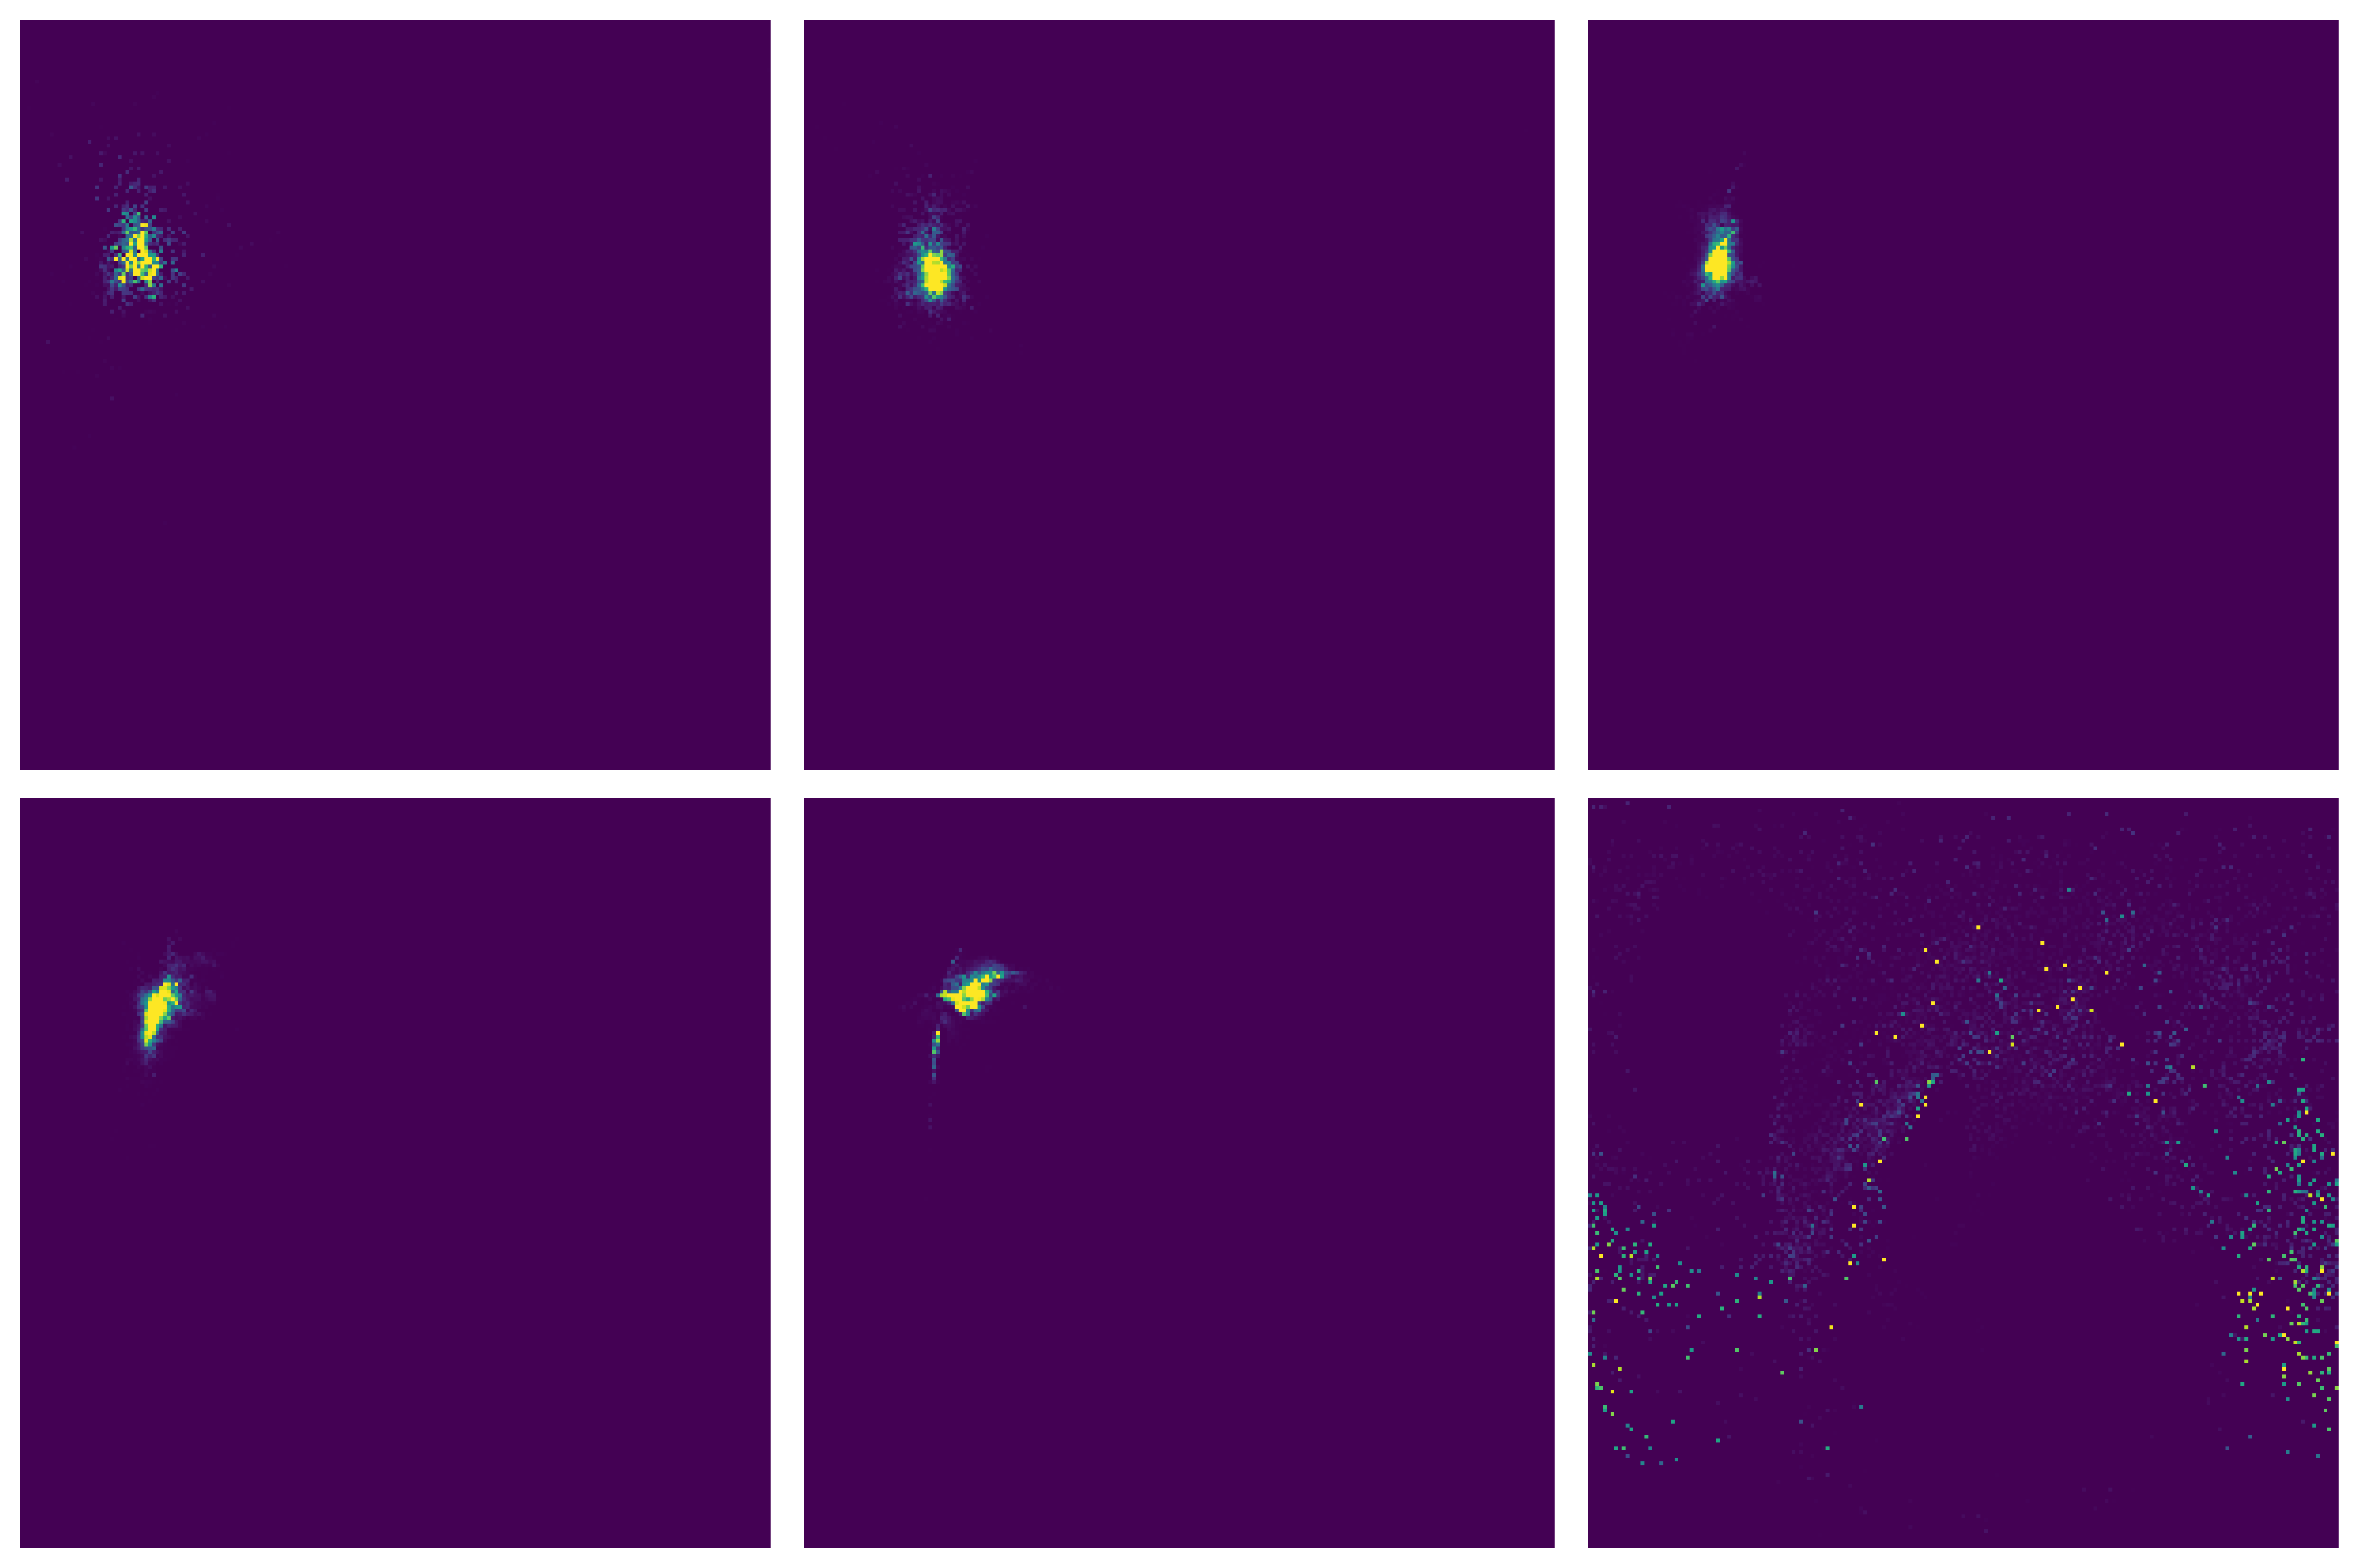

In [153]:
fig, axes = plt.subplots(2,3, figsize = (12, 8), facecolor = 'white')

for ii, ax in enumerate(axes.ravel()[:-1]):
    Lhst_full = a['cold']['c_dist']['L_hst'][ii:ii+1,1:2,:3,:]
    dim_tuple = tuple(np.arange(Lhst_full.ndim-2))
    Lhst  = np.rot90(np.nansum(Lhst_full, axis = dim_tuple))
    Lhst_rvl = Lhst.ravel()
    vmn, vmx = np.nanpercentile(Lhst_rvl[isfinite(Lhst_rvl)], [30])[0], np.nanpercentile(Lhst_rvl[isfinite(Lhst_rvl)], [99.9])[0]

    ax.imshow(Lhst, cmap = cmp, vmin = vmn, vmax = vmx)
    ax.axis('off')
    #ax = build_ax(ax)
    
ax = axes.ravel()[-1]
Lhst_full = a['hot']['c_dist']['L_hst'][:1,:1,4:,:]
dim_tuple = tuple(np.arange(Lhst_full.ndim-2))
Lhst  = np.rot90(np.nansum(Lhst_full, axis = dim_tuple))
Lhst_rvl = Lhst.ravel()
vmn, vmx = np.nanpercentile(Lhst_rvl[isfinite(Lhst_rvl)], [30])[0], np.nanpercentile(Lhst_rvl[isfinite(Lhst_rvl)], [99.9])[0]

ax.imshow(Lhst, cmap = cmp, vmin = vmn, vmax = vmx)
ax.axis('off')
#ax = build_ax(ax)
    
    
    
fig.set_dpi(400)
fig.tight_layout()


In [137]:
a['hot']['c_dist']['hst_bins']

[array([ 0.,  4.,  8., 12., 16., 20.]),
 array([-30,  -2,   2,  30]),
 array([ -inf, -250., -100.,    0.,  100.,  250.,   inf]),
 array([0.  , 0.02, 1.  ,  inf]),
 array([-180.        , -178.19095477, -176.38190955, -174.57286432,
        -172.7638191 , -170.95477387, -169.14572864, -167.33668342,
        -165.52763819, -163.71859296, -161.90954774, -160.10050251,
        -158.29145729, -156.48241206, -154.67336683, -152.86432161,
        -151.05527638, -149.24623116, -147.43718593, -145.6281407 ,
        -143.81909548, -142.01005025, -140.20100503, -138.3919598 ,
        -136.58291457, -134.77386935, -132.96482412, -131.15577889,
        -129.34673367, -127.53768844, -125.72864322, -123.91959799,
        -122.11055276, -120.30150754, -118.49246231, -116.68341709,
        -114.87437186, -113.06532663, -111.25628141, -109.44723618,
        -107.63819095, -105.82914573, -104.0201005 , -102.21105528,
        -100.40201005,  -98.59296482,  -96.7839196 ,  -94.97487437,
         -93.16582915

In [63]:
np.savez_compressed('/Users/rsimons/Desktop/test_compressed', a = a)
np.save('/Users/rsimons/Desktop/test_uncompressed.npy', a)


In [54]:
b = np.load('/Users/rsimons/Desktop/test_compressed.npz', allow_pickle = True)['a'][()]

In [33]:
l = b['a']

In [62]:
np.array_equal(b['cold']['r_dist']['L_hst'], a['cold']['r_dist']['L_hst'])

True

In [52]:
a

{'props': {'bulk_velocity': unyt_array([ -37.08763694, -118.24727446,   45.8579986 ], 'km/s'),
  'center': unyt_array([23696.61591172, 23450.51900858, 24087.90083912], 'kpc'),
  'sphere_radius': (250.0, 'kpc'),
  'disk_Lhat': array([ 0.77820234,  0.51205433, -0.36359522])},
 'cold': {'rprof': {'r': unyt_array([  0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,
                 3.75,   4.25,   4.75,   5.25,   5.75,   6.25,   6.75,
                 7.25,   7.75,   8.25,   8.75,   9.25,   9.75,  10.25,
                10.75,  11.25,  11.75,  12.25,  12.75,  13.25,  13.75,
                14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,
                17.75,  18.25,  18.75,  19.25,  19.75,  20.25,  20.75,
                21.25,  21.75,  22.25,  22.75,  23.25,  23.75,  24.25,
                24.75,  25.25,  25.75,  26.25,  26.75,  27.25,  27.75,
                28.25,  28.75,  29.25,  29.75,  30.25,  30.75,  31.25,
                31.75,  32.25,  32.75,  33.25,  33.75,  34.25,  

In [61]:
b['cold']['r_dist']['L_hst'].shape

(29, 6, 3, 199, 199)

In [48]:
l

array({'props': {'bulk_velocity': unyt_array([ -37.08763694, -118.24727446,   45.8579986 ], 'km/s'), 'center': unyt_array([23696.61591172, 23450.51900858, 24087.90083912], 'kpc'), 'sphere_radius': (250.0, 'kpc'), 'disk_Lhat': array([ 0.77820234,  0.51205433, -0.36359522])}, 'cold': {'rprof': {'r': unyt_array([  0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,
              3.75,   4.25,   4.75,   5.25,   5.75,   6.25,   6.75,
              7.25,   7.75,   8.25,   8.75,   9.25,   9.75,  10.25,
             10.75,  11.25,  11.75,  12.25,  12.75,  13.25,  13.75,
             14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,
             17.75,  18.25,  18.75,  19.25,  19.75,  20.25,  20.75,
             21.25,  21.75,  22.25,  22.75,  23.25,  23.75,  24.25,
             24.75,  25.25,  25.75,  26.25,  26.75,  27.25,  27.75,
             28.25,  28.75,  29.25,  29.75,  30.25,  30.75,  31.25,
             31.75,  32.25,  32.75,  33.25,  33.75,  34.25,  34.75,
             35.25,  